In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:

# Step 2: Load the dataset
data_url = "https://raw.githubusercontent.com/HarpyTech/DSAI-MTech/refs/heads/main/Sem_2/ML-3/Mini-Project/ML3%20data.csv"
df = pd.read_csv(data_url)

In [3]:


# Step 4: Initial Data Exploration
print("Dataset Shape:", df.shape)
print("Missing Values:")
print(df.isnull().sum())

Dataset Shape: (9813, 662)
Missing Values:
SEQN        0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
           ..
ar21        0
ar22        0
ar23        0
ar24        0
ar25        0
Length: 662, dtype: int64


In [4]:


# Step 5-8: Data Cleaning - Fill missing values with zeros
df.fillna(0, inplace=True)

In [5]:


# Step 9: Feature Selection - Select numerical features
df_numeric = df.select_dtypes(include=[np.number])


# Drop non-essential columns (modify as needed)
drop_cols = []  # Add columns to drop if necessary
df_numeric = df_numeric.drop(columns=drop_cols, errors='ignore')

In [6]:

# Step 10: Data Transformation - Scale numerical features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

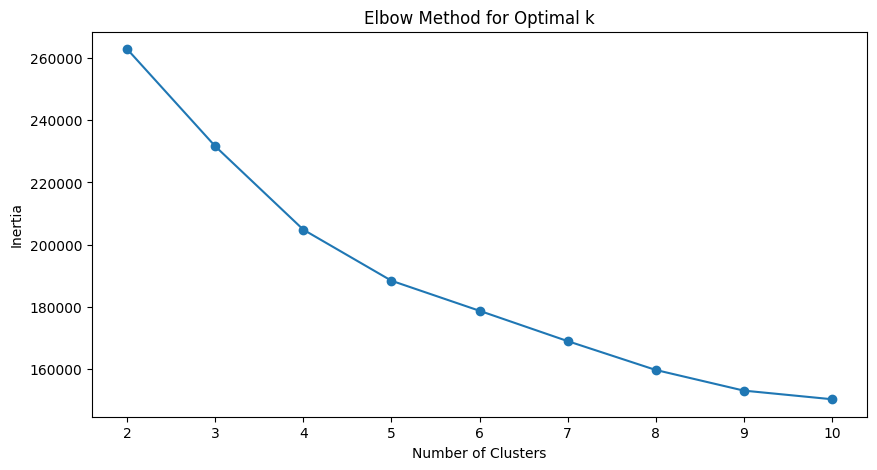

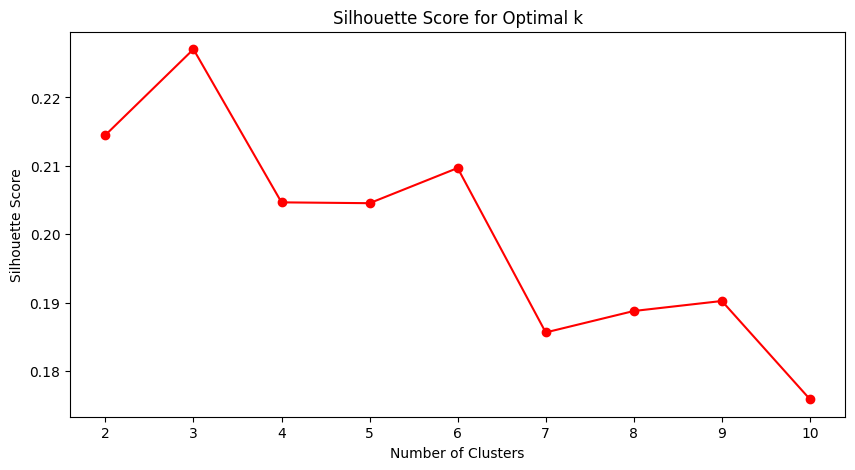

Optimal number of clusters based on silhouette score: 3


In [7]:

# Step 11: Optimal Cluster Identification
inertia = []
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))

# Elbow method plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette scores plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, sil_scores, marker='o', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

optimal_k = k_range[sil_scores.index(max(sil_scores))]
print("Optimal number of clusters based on silhouette score:", optimal_k)


In [8]:
# Step 12: KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['Cluster'] = kmeans_labels



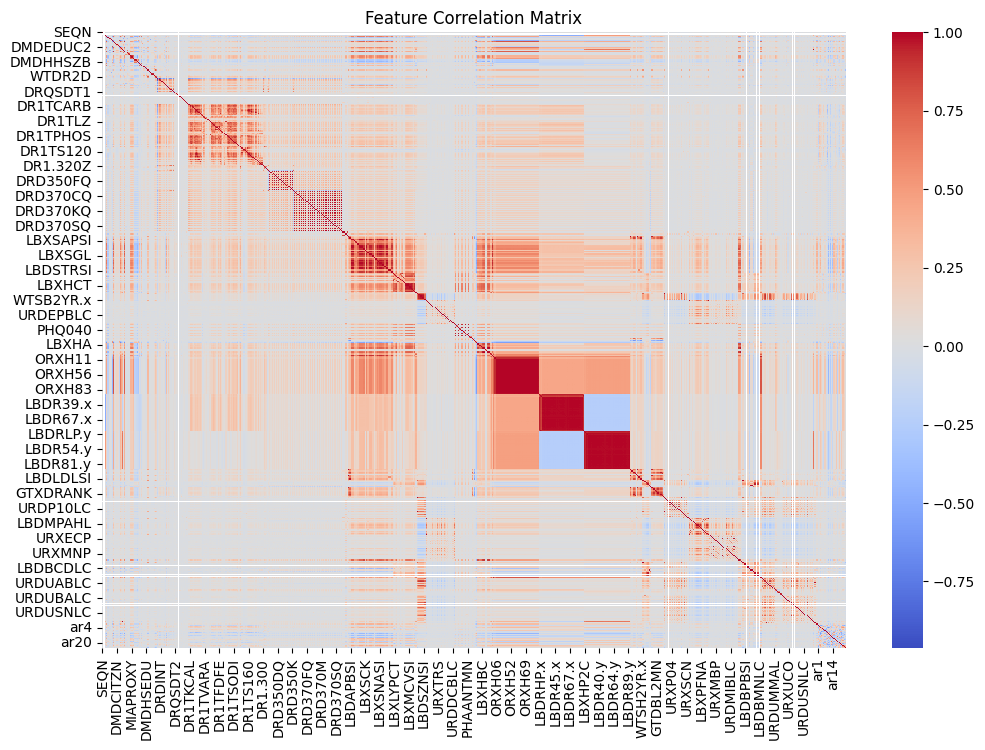

In [9]:

# Step 13: Correlation Analysis
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [10]:
# Step 14: PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
print("Number of principal components retained:", pca.n_components_)

Number of principal components retained: 79


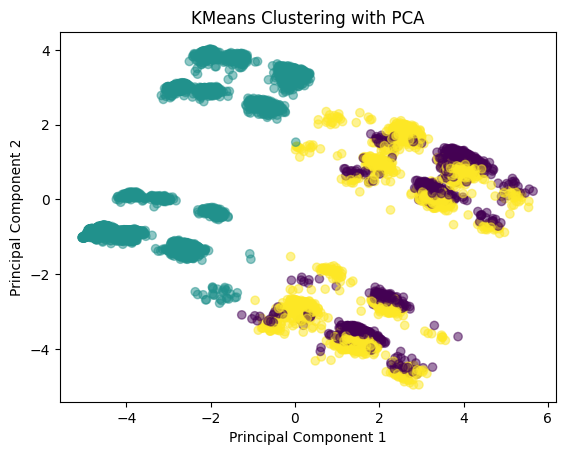

In [11]:
# Step 15: KMeans with PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_pca_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.show()

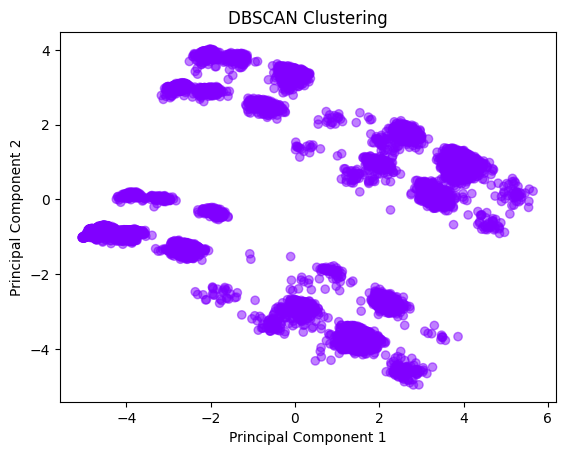

In [12]:
# Step 16: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='rainbow', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

In [13]:


# Step 17: Conclusion
print("Clustering analysis completed. The dataset was segmented using KMeans and DBSCAN.")

Clustering analysis completed. The dataset was segmented using KMeans and DBSCAN.
